# Feature Engineering CW



## All steps must be done programmatically

### Import required packages

In [1]:
# to handle datasets
import pandas as pd
import numpy as np

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)
# suppress some warning
pd.options.mode.chained_assignment = None  # default='warn'

# Add Imports here


### Load the data and Plot a Histogram of the SalePrice column

array([[<AxesSubplot:title={'center':'SalePrice'}>]], dtype=object)

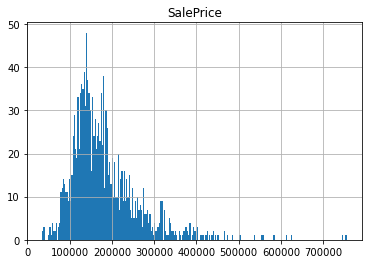

In [2]:
# load dataset
data = pd.read_csv(r'C:\Users\GAMING\Downloads\house-price-data\house-price-data.csv')

data.hist(column='SalePrice',  bins = 250)

### 1- The SalePrice column is not normally distributed (i.e. not Gaussian), prove this by running a statistical test and obtaining and interpreting the p-value (you can use if else to check the p-value and interpret it). (5 Marks)

In [34]:
# Test to check normality of the SalePrice column
# do a normality test


Does not look Gaussian!


### Split data into Train and Test sub-datasets
### Do not change this code

In [4]:
### Split data into train and test sets 
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(
    X, # features or predictive variables
    y, # target
    test_size=0.3, # portion of dataset to allocate to test set
    random_state=10, # we are setting the seed here
)

X_train.shape, X_test.shape

((1022, 54), (438, 54))

### 2. Create a list of all categorical variables (by checking their type in the original dataset). (2 marks)
Correct solution says there are 19 of them.

In [5]:
# let's identify the categorical variables
# we will capture those of type object



# number of categorical variables
len(cat_vars)

19

### 3. Using the training set (X_train) Create a list of all categorical variables that contain missing data and print percentage of missing values per variable. (3 marks)

In [6]:
# make a list of the categorical variables that contain missing values



# print percentage of missing values per variable




Alley           93.444227
Fence           80.528376
FireplaceQu     46.868885
GarageFinish     5.381605
GarageQual       5.381605
GarageCond       5.381605
BsmtQual         2.544031
BsmtCond         2.544031
BsmtExposure     2.544031
BsmtFinType1     2.544031
BsmtFinType2     2.544031
dtype: float64

### 4. Using the result of the previous step: For categorical variables with more than 10% of data missing, replace missing data with the word 'Missing', in other variables replace the missing data with the most frequent category in  the training set (Apply the replacement to X_train and X_test and make sure it is based on the results you have obtained from the training set). (5 marks)

In [7]:
# variables to impute with the string missing




# variables to impute with the most frequent category





In [8]:
print(with_string_missing)
print(with_frequent_category)

['Alley', 'FireplaceQu', 'Fence']
['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageFinish', 'GarageQual', 'GarageCond']


In [9]:
# replace missing values in X_train and X_test with new label: "Missing"




In [35]:
# replace missing values in X_train and X_test with the mode of each variable



In [11]:
# check that we have no missing information in the engineered variables
X_train[cat_vars_with_na].isnull().sum()

Alley           0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageFinish    0
GarageQual      0
GarageCond      0
Fence           0
dtype: int64

### 5. Create a list of all numerical variables (do not include SalePrice). (2 marks)
Correct solution says there are 35 of them.

In [12]:
# now let's identify the numerical variables




# number of numerical variables
len(num_vars)

35

### 6. Create a list of all numerical variables that contain missing data and print out the percentage of missing values per variable (use the training data). (3 marks)

In [13]:
# make a list with the numerical variables that contain missing values


# print percentage of missing values per variable




LotFrontage    17.318982
GarageYrBlt     5.381605
MasVnrArea      0.489237
dtype: float64

### 7. Using the result of the previous step: For numerical variables with less than 15% of data missing, replace missing data with the mean of the variable, in other variables replace the missing data with the median of the variable in the training set (Apply the replacement to X_train and X_test and make sure it is based on the results you have obtained from the training set).     (5 marks)

In [14]:
# variables to impute with the median
with_mean = 

# variables to impute with the mean
with_median = 


In [36]:
# replace missing values as we described above


        

In [16]:
# check that we have no more missing values in the engineered variables
X_test[vars_with_na].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

### 8. In the train and test sets, replace the values of variables 'YearBuilt', 'YearRemodAdd' and 'GarageYrBlt' with the time elapsed between them and the year in which the house was sold 'YrSold' and then drop the  'YrSold' column (5 marks)

In [19]:
# now we drop YrSold
X_train.drop(['YrSold'], axis=1, inplace=True)
X_test.drop(['YrSold'], axis=1, inplace=True)

### 9. Apply mappings to categorical variables that have an order (5 marks)

Some of the categorical variables have values with an assigned order (in total there should be 14 of them), related to quality (For more information, check the data description file). This means, we can replace categories by numbers to determine quality. For example, values in the 'BsmtExposure' can be mapped as follows: 'No' can be mapped to 1, 'Mn' can be mapped to 2, 'Av' can be mapped to 3 and 'Gd' can be mapped to 4. 

One way of doing this is to manually create mappings similar to the example given. Each mapping can be saved as a Python dictionary and used to perform the actual mapping to transform the described variables from categorical to numerical.

To Make it easier for you, here are groups of variables that have the same mappings (Hint: you can map both categories 'Missing' and 'NA' to 0): 

- The following variable groups have the same mapping: 
    - ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu','GarageQual', 'GarageCond']
    - ['BsmtFinType1', 'BsmtFinType2']

- Each of the following variables has its own mapping: 'BsmtExposure', 'GarageFinish', 'Fence'

In [20]:
# re-map strings to numbers, which determine quality

qual_mappings = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0}

qual_vars = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
             'HeatingQC', 'KitchenQual', 'FireplaceQu',
             'GarageQual', 'GarageCond'
            ]


## Loop through the variables and apply the mapping here
# Apply mapping on the train and test sets




In [21]:
exposure_mappings = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}

var = 'BsmtExposure'

## Apply the mapping here
# Apply mapping on the train and test sets




In [22]:
finish_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

finish_vars = ['BsmtFinType1', 'BsmtFinType2']

## Loop through the variables and apply the mapping here
# Apply mapping on the train and test sets




In [23]:
garage_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

var = 'GarageFinish'

## Apply the mapping here
# Apply mapping on the train and test sets




In [24]:
fence_mappings = {'Missing': 0, 'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

var = 'Fence'

## Apply the mapping here
# Apply mapping on the train and test sets



In [25]:
# check absence of na in the train set
[var for var in X_train.columns if X_train[var].isnull().sum() > 0]

[]

In [26]:
X_train.head()

,LotFrontage,LotArea,Alley,LandContour,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold
912,51.0,6120,Missing,Lvl,1Fam,1Story,5,7,81,56,Gable,0.0,3,3,3,3,1,3,489,1,0,279,768,3,1015,0,0,1015,0,0,1,0,3,1,3,6,0,0,81.0,1,1,450,3,3,0,0,112,0,120,0,3,620,7
373,79.0,10634,Missing,Lvl,1Fam,1Story,5,6,56,56,Gable,0.0,3,3,3,3,1,4,428,2,180,0,608,3,1319,0,0,1319,1,0,1,0,3,1,3,5,0,0,56.0,1,1,270,3,3,66,0,0,0,0,0,2,0,11
20,101.0,14215,Missing,Lvl,1Fam,2Story,8,5,1,0,Gable,380.0,4,3,5,3,3,1,0,1,0,1158,1158,5,1158,1218,0,2376,0,0,3,1,4,1,4,9,1,4,1.0,2,3,853,3,3,240,154,0,0,0,0,0,0,11
800,79.0,12798,Missing,HLS,1Fam,2Story,6,5,11,11,Gable,0.0,3,3,4,3,4,6,462,1,0,154,616,4,616,1072,0,1688,1,0,2,1,4,1,4,8,0,0,11.0,2,2,603,3,3,403,114,185,0,0,0,0,400,5
152,69.0,14803,Missing,Lvl,1Fam,2Story,6,5,35,35,Gable,252.0,3,3,3,3,1,3,416,1,0,409,825,4,1097,896,0,1993,0,0,2,1,4,1,3,8,1,4,35.0,2,2,495,3,3,0,66,0,0,0,0,2,0,6


### 10. Replace Rare Labels with 'Rare' (5 marks)

For the remaining five categorical variables (the variables that you did not apply value mappings to, they should be five variables), you will need to group those categories that are present in less than 1% of the observations in the training set. That is, all values of categorical variables that are shared by less than 1% of houses in the training set will be replaced by the string "Rare" in both the training and test set. 

- Find rare labels in the remaining categorical variables and replace them with the category 'Rare'.
- Rare labels are those categories that only appear in a small percentage of the observations (in our case in < 1%).
- If you look at unique values in a categorical variable in the training set and count how many times each of the unique values appear in the variable, you can compute the percentage of each unique value by dividing its count by the total number of observations.
- Remember to make the computions using the training set and replacement in both training and test sets.

In [27]:
# capture all quality variables

qual_vars  = qual_vars + finish_vars + ['BsmtExposure','GarageFinish','Fence']

# capture the remaining categorical variables
# (those that we did not re-map)

cat_others = [
    var for var in cat_vars if var not in qual_vars
]

len(cat_others)

5

In [28]:
## Loop through the variables and apply the replacement here
# Apply replacement on the train and test sets




### 11. One hot encoding of categorical variables (5 marks)
Perform one hot encoding to transform the previous five categorical variables into binary variables. Make sure you do it correctly for both the training and testing sets. After this, remember to drop the original five categorical variables (the ones with the strings) from the training and test after the encoding.

In [29]:
## Loop through the variables and apply the one-hot encoding here
# Apply encoding on the train and test sets
# Pay attention and make sure you do it correctly



In [30]:
# check absence of na in the train set
[var for var in X_train.columns if X_train[var].isnull().sum() > 0]

[]

In [31]:
# check absence of na in the test set
[var for var in X_test.columns if X_test[var].isnull().sum() > 0]

[]

### 12. Feature Scaling (5 marks)
Now we know all variables in our two datasets (i.e. the training and test sets) are numerical, the final step in this exercise is to apply scaling by making sure the minimum value in each variable is 0 and the maximum value is 1. For this step, you can use MinMaxScaler() from sci-kit learn. Make sure you apply it correctly by transforming the test set based on the training set. 

In [32]:
## Apply scaling here
# Make sure you do it correctly




In [33]:
print(X_train.mean().mean())
print(X_test.mean().mean())

0.2493675956428052
0.24726779582803798



# Well done!